# Activity: Address missing data 

## Introduction

The datasets that data professionals use to solve problems typically contain missing values, which must be dealt with in order to achieve clean, useful data. This is particularly crucial in exploratory data analysis (EDA). In this activity, you will learn how to address missing data. 

You are a financial data consultant, and an investor has tasked your team with identifying new business opportunities. To help them decide which future companies to invest in, you will provide a list of current businesses valued at more than $1 billion. These are sometimes referred to as "unicorns." Your client will use this information to learn about profitable businesses in general.

The investor has asked you to provide them with the following data: 
- Companies in the `hardware` industry based in either `Beijing`, `San Francisco`, or `London` 
- Companies in the `artificial intelligence` industry based in `London`
-  A list of the top 20 countries sorted by sum of company valuations in each country, excluding `United States`, `China`, `India`, and `United Kingdom`
- A global valuation map of all countries with companies that joined the list after 2020
- A global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` (a separate map for Europe is also required)

Your dataset includes a list of businesses and data points, such as the year they were founded; their industry; and their city, country, and continent. 

## **Step 1: Imports** 

### Import libraries

Import the following relevant Python libraries:
* `numpy`
* `pandas`
* `matplotlib.pyplot`
* `plotly.express`
* `seaborn`



In [1]:
# Import libraries and modules.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
### YOUR CODE HERE ###

### Load the dataset


The dataset is currently in CSV format and in a file named `Unicorn_Companies.csv`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
df_companies = pd.read_csv("Unicorn_Companies.csv")

## **Step 2: Data exploration** 

Explore the dataset and answer questions that will guide your management of missing values. 

### Display top rows

Display the first 10 rows of the data to understand how the dataset is structured.

In [3]:
# Display the first 10 rows of the data.
df_companies.head()
### YOUR CODE HERE ###

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the materials about exploratory data analysis in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to get a specific number of rows from the top of a DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

  Call the `head(10)` function from the `pandas` library. 

</details>

### Statistical properties of the dataset

Use methods and attributes of the dataframe to get information and descriptive statistics for the data, including its range, data types, mean values, and shape. 


In [4]:
# Get the shape of the dataset.
df_companies.shape
### YOUR CODE HERE ###

(1074, 10)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the material about exploratory data analysis in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  Call the `shape` attribute of the dataframe.

</details>

**Question: What is the shape of the dataset?**

[Write your response here. Double-click (or enter) to edit.]

In [6]:
# Get the data types and number of non-null values in the dataset.
df_companies.dtypes
### YOUR CODE HERE ###

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the material about exploratory data analysis in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  Use the `info()` method.

</details>

**Question: What are the data types of various columns?**


[Write your response here. Double-click (or enter) to edit.]

**Question: How many columns contain non-null values?**

[Write your response here. Double-click (or enter) to edit.]

In [7]:
# Get descriptive statistics such as mean, standard deviation, and range of the numerical columns in the dataset.
df_companies.describe()
### YOUR CODE HERE ###

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the material about exploratory data analysis in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to find descriptive statistics for the numeric columns in a DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

  Call the `describe()` function from the `pandas` library.

</details>

**Question: In what year was the oldest company founded?**

[Write your response here. Double-click (or enter) to edit.]

### Data Preprocessing

In order to answer the investor's questions, some data preprocessing steps are required. The first step is to add a new column to the dataframe containing just the year each company became a unicorn company. Call this new column `Year Joined`. 

In [12]:
# Create a new column "Year Joined" from "Date Joined".
df_companies['Year Joined'] = pd.to_datetime(df_companies['Date Joined']).dt.year
### YOUR CODE HERE ###

For each country, you want to calculate the sum of all valuations of companies from that country. However, in order to do this, you'll need to first prepare the data. Currently, the data in the `Valuation` column is a string that starts with a `$` and ends with a `B`. Because this column is not in a numeric datatype, pandas cannot perform mathematical operations on its values. The data in this column needs to be converted to a numeric datatype. 

In this step, define a function called `str_to_num()` that accepts as an argument:

* `x`: a string in the format of the values contained in the `Valuation` column

And returns:

* `x`: an `int` of the number represented by the input string

```
Example:

 [IN]:  str_to_num('$4B')
[OUT]:  4

```


To do this, use the string [`strip()`](https://docs.python.org/3/library/stdtypes.html#str.strip) method. This method is applied to a string. Its argument is a string that contains all the characters that you want to remove from the beginning and end of a given string&mdash;in any order. The specified characters will be removed until a valid character is encountered. This process is applied moving forward from the beginning of the string and also moving in reverse from the end of the string, thus removing unwanted beginning and trailing characters.

```
Example:

 [IN]:  my_string = '#....... Section 3.2.1 Issue #32 .......'
        my_string = my_string.strip('.#! ')
        print(my_string)

[OUT]:  'Section 3.2.1 Issue #32'

```

Note that you must reassign the result back to a variable or else the change will not be permanent. 

In [28]:
# Define the `str_to_num()` function
def str_to_num(x):
    x = x.strip('$B')
    x = int(x)
    return(x)
### YOUR CODE HERE ###

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

The unwanted characters in the values contained in the `Valuation` column are `'$'` and `'B'`.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Pass a string of the unwanted values as an argument to the `strip()` string method.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

The final step before returning `x` should be converting it to an integer.
    
</details>

Now, use this function to create a new column called `valuation_num` that represents the `Valuation` column as an integer value. To do this, use the series method [`apply()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) to apply the `str_to_num()` function to the `Valuation` column.

`apply()` is a method that can be used on a `DataFrame` or `Series` object. In this case, you're using it on the `Valuation` series. The method accepts a function as an argument and applies that function to each value in the series.

```
Example:

 [IN]: def square(x):
           return x ** 2

       my_series = pd.Series([0, 1, 2, 3])
       my_series

[OUT]: 0    0
       1    1
       2    2
       3    3
       dtype: int64

 [IN]: my_series = my_series.apply(square)
       my_series

[OUT]: 0    0
       1    1
       2    4
       3    9
       dtype: int64
```

Notice that the function passed as an argument to the `apply()` method does not have parentheses. It's just the function name.

In [29]:
# Apply the `str_to_num()` function to the `Valuation` column
# and assign the result back to a new column called `valuation_num`
df_companies['valuation_num'] = df_companies['Valuation'].apply(str_to_num) 
### YOUR CODE HERE ###
df_companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,180
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,100
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,100
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,95
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,46


### Find missing values

The unicorn companies dataset is fairly clean, with few missing values. 

In [26]:
# Find the number of missing values in each column in this dataset.
df_companies.isna().sum()
### YOUR CODE HERE ###

Company                0
Valuation              0
Date Joined            0
Industry               0
City                  16
Country/Region         0
Continent              0
Year Founded           0
Funding                0
Select Investors       1
Year Joined            0
valuation_num       1074
dtype: int64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

The `isna()` `DataFrame` method will return a dataframe of Boolean values in the same shape as your original dataframe. Values are `True` if the data is missing and `False` if it is not missing.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

You'll need to convert Boolean values into numerical values. Remember that `True` values are considered `1` and `False` values are considered `0`.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

After applying the `isna()` method to the `df_companies` dataframe, apply the `sum()` method to the results to return a pandas `Series` object with each column name and the number of `NaN` values it contains.
    
</details>

 **Question: How many missing values are in each column in the dataset?**

[Write your response here. Double-click (or enter) to edit.]

### Review rows with missing values

Before dealing with missing values, it's important to understand the nature of the missing value that is being filled. Display all rows with missing values from `df_companies`. To do this, perform the following three steps:

1. Apply the `isna()` method to the `df_companies` dataframe as you did in the last step. Remember, this results in a dataframe of the same shape as `df_companies` where each value is `True` if its contents are `NaN` and a `False` if its contents are not `NaN`. Assign the results to a variable called `mask`.

In [35]:
# 1. Apply the `isna()` method to the `df_companies` dataframe and assign back to `mask`
mask = df_companies.isna()
### YOUR CODE HERE ###

You're not done yet. You still need to go from this dataframe of Boolean values to a dataframe of just the rows of `df_companies` that contain at least one `NaN` value. This means that you need a way to find the indices of the rows of the Boolean dataframe that contain at least one `True` value, then extract those indices from `df_companies`. 

You can do this using the [`any()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html) method for `DataFrame` objects. This method returns a Boolean `Series` indicating whether any value is `True` over a specified axis.

```
Example:

df =     
        A      B    C
    0   0      a    10
    1   False  0    1
    2   NaN    NaN  NaN


 [IN]: df.any(axis=0)

[OUT]: A    False
       B     True
       C     True
       dtype: bool
       
 [IN]: df.any(axis=1)
 
[OUT]: 0     True
       1     True
       2    False
       dtype: bool
```

Note that `0`, `False`, and `NaN` are considered `False` and anything else is considered `True`. 

2. Apply the `any()` method to the Boolean dataframe you created to make a Boolean series where each element in the series represents `True` if a row of the dataframe contains any `True` values and `False` if any row in the dataframe contains any `False` values. Assign the results back to `mask`.

In [36]:
# 2. Apply the `any()` method to `mask` and assign the results back to `mask`
mask = mask.any(axis = 1)

### YOUR CODE HERE ###

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the example given for how to use the `any()` method for dataframes.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Using the provided example as a guide, which axis returns **rows** that have at least one `True` value?
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

`mask.any(axis=1)` will return a Boolean series that represents whether each row of `mask` contains at least one `True` value. 
    
</details>

3. Because `mask` is now a series of Boolean values, you can use it as a Boolean mask. Apply the Boolean mask to the `df_companies` dataframe to return a filtered dataframe containing just the rows that contain a missing value. Assign the results to a variable called `df_missing_rows`.

In [37]:
# 3. Apply `mask` as a Boolean mask to `df_companies` and assign results to `df_missing_rows`
df_missing_rows = df_companies[mask]
### YOUR CODE HERE ###
df_missing_rows

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
12,FTX,$32B,7/20/21,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,7/22/19,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,6/21/21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,6/1/21,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


**Question: Is there a specific country/region that shows up a lot in this missing values dataframe? Which one?**


[Write your response here. Double-click (or enter) to edit.]

**Question: What steps did you take to find missing data?**


[Write your response here. Double-click (or enter) to edit.]

**Question: What observations can be made about the forms and context of missing data?**


[Write your response here. Double-click (or enter) to edit.]

**Question: What other methods could you use to address missing data?**


[Write your response here. Double-click (or enter) to edit.]

## Step 3: Model building

Think of the model you are building as the completed dataset, which you will then use to inform the questions the investor has asked of you.  

### Two ways to address missing values

There are several ways to address missing values, which is critical in EDA. The two primary methods are removing them and imputing other values in their place. Choosing the proper method depends on the business problem and the value the solution will add or take away from the dataset.

Here, you will try both. 

To compare the the effect of different actions, first store the original number of values in a variable. Create a variable called `count_total` that is an integer representing the total number of values in `df_companies`. For example, if the dataframe had 5 rows and 2 columns, then this number would be 10.

In [43]:
# Store the total number of values in a variable called `count_total`
count_total = df_companies.size
count_total
### YOUR CODE HERE ###

12888

Now, remove all rows containing missing values and store the total number of remaining values in a variable called `count_dropna_rows`.

In [56]:
# Drop the rows containing missing values, determine number of remaining values 
count_dropna_rows = df_companies.dropna().size
### YOUR CODE HERE ###

<details>
  <summary><h4><strong>Hint</strong></h4></summary>

  Use the `dropna()` dataframe method to drop rows with missing values.

</details>

Now, remove all columns containing missing values and store the total number of cells in a variable called `count_dropna_columns`.

In [57]:
# Drop the columns containing missing values, determine number of remaining values
count_dropna_columns = df_companies.dropna(axis = 1).size
### YOUR CODE HERE ###

<details>
  <summary><h4><strong>Hint</strong></h4></summary>

Specify `axis=1` to the `dropna()` method to drop columns with missing values.

</details>

Next, print the percentage of values removed by each method and compare them.

In [58]:
# Print the percentage of values removed by dropping rows.
print((count_total - count_dropna_rows) / count_total)
### YOUR CODE HERE ###

# Print the percentage of values removed by dropping columns.
print((count_total - count_dropna_columns) / count_total)
### YOUR CODE HERE ###


0.015828677839851025
0.16666666666666666


**Question: Which method was most effective? Why?**


[Write your response here. Double-click (or enter) to edit.]

Now, practice the second method: imputation. Perform the following steps:

1. Use the [`fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) dataframe method to fill each missing value with the next non-NaN value in its column. Assign the results to a new dataframe called `df_companies_backfill`.

```
Example:

df =     
        A    B    C
    0   5    a    NaN
    1   10   NaN  False
    2   NaN  c    True

 [IN]: df.fillna(method='backfill')
 
[OUT]: 
        A    B    C
    0   5    a    False
    1   10   c    False
    2   NaN  c    True

```

Notice that if there is a `NaN` value in the last row, it will not backfill because there is no subsequent value in the column to refer to. 

2. Show the rows that previously had missing values.

In [60]:
# 1. Fill missing values using the 'fillna()' method, back-filling
df_companies_backfill = df_companies.fillna(method = 'backfill')
### YOUR CODE HERE ###


# 2. Show the rows that previously had missing values

### YOUR CODE HERE ###
df_companies_backfill.iloc[df_missing_rows.index, :]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
12,FTX,$32B,7/20/21,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,7/22/19,Artificial intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,6/21/21,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve...",2015,1
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,6/1/21,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

To backfill missing values, refer to the example provided.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

To show the rows that previously had missing values, you'll need the indices of the rows that had missing values.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

* You already have a dataframe of rows with missing values. It's stored in a variable called `df_missing_rows`.  
* To access its index, call `df_missing_rows.index`. This will give you the row numbers of rows with missing values.  
* Use these index numbers in an iloc[] selection statement on the `df_companies_backfill` dataframe to extract those row numbers.

</details>

**Question: Do the values that were used to fill in for the missing values make sense?**


[Write your response here. Double-click (or enter) to edit.]

Another option is to fill the values with a certain value, such as 'Unknown'. However, doing so doesn’t add any value to the dataset and could make finding the missing values difficult in the future. Reviewing the missing values in this dataset determines that it is fine to leave the values as they are. This also avoids adding bias to the dataset.

## Step 4: Results and evaluation

Now that you've addressed your missing values, provide your investor with their requested data points.

### Companies in the `Hardware` Industry

Your investor is interested in identifying unicorn companies in the `Hardware` industry in the following cities: `Beijing`, `San Francisco`, and `London`. They are also interested in companies in the `Artificial intelligence` industry in `London`. 

Write a selection statement that extracts the rows that meet these criteria. This task requires complex conditional logic. Break the process into the following parts.

1. Create a mask to apply to the `df_companies` dataframe. The following logic is a pseudo-code representation of how this mask could be structured.

```
((Industry==Hardware) and (City==Beijing, San Francisco, or London)) 
OR  
((Industry==Artificial intelligence) and (City==London))
```

You're familiar with how to create Boolean masks based on conditional logic in pandas. However, you might not know how to write a conditional statement that selects rows that have _any one of several possible values_ in a given column. In this case, this is the `(City==Beijing, San Francisco, or London)` part of the expression.

For this type of construction, use the [`isin()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin) `Series` method. This method is applied to a pandas series and, for each value in the series, checks whether it is a member of whatever is passed as its argument.

```
Example:

 [IN]: my_series = pd.Series([0, 1, 2, 3])
       my_series
       
[OUT]: 0    0
       1    1
       2    2
       3    3
       dtype: int64
       
 [IN]: my_series.isin([1, 2])
       
[OUT]: 0    False
       1     True
       2     True
       3    False
       dtype: bool
       
```

2. Apply the mask to the `df_companies` dataframe and assign the result to a new variable called `df_invest`.

In [66]:
# 1. Create a Boolean mask using conditional logic
cities = ['Beijing', 'San Fransisco', 'London']
mask = (
    (df_companies['Industry'] == 'Hardware') & (df_companies['City'].isin(cities))
    |(df_companies['Industry'] == 'Artificial intelligence') & (df_companies['City'] == 'London') 
)
### YOUR CODE HERE ###

# 2. Apply the mask to the `df_companies` dataframe and assign the results to `df_invest`
df_invest = df_companies[mask]
df_invest

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
36,Bitmain,$12B,7/6/18,Hardware,Beijing,China,Asia,2015,$765M,"Coatue Management, Sequoia Capital China, IDG ...",2018,12
43,Global Switch,$11B,12/22/16,Hardware,London,United Kingdom,Europe,1998,$5B,"Aviation Industry Corporation of China, Essenc...",2016,11
147,Chipone,$5B,12/16/21,Hardware,Beijing,China,Asia,2008,$1B,"China Grand Prosperity Investment, Silk Road H...",2021,5
873,BenevolentAI,$1B,6/2/15,Artificial intelligence,London,United Kingdom,Europe,2013,$292M,Woodford Investment Management,2015,1
923,Geek+,$1B,11/21/18,Hardware,Beijing,China,Asia,2015,$439M,"Volcanics Ventures, Vertex Ventures China, War...",2018,1
1040,TERMINUS Technology,$1B,10/25/18,Hardware,Beijing,China,Asia,2015,$623M,"China Everbright Limited, IDG Capital, iFLYTEK",2018,1
1046,Tractable,$1B,6/16/21,Artificial intelligence,London,United Kingdom,Europe,2014,$120M,"Insight Partners, Ignition Partners, Georgian ...",2021,1


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  * Remember that pandas uses `&` for "and", `|` for "or", and `~` for "not". 
  * Remember that each condition needs to be in its own set of parentheses. Refer to the above pseudo-code for an example.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  * Use `(Series.isin(list_of_cities))` to represent the logic: (City==Beijing, San Francisco, or London)`.
  * There are two sets of conditional pairs: ((A) and (B)) or ((C) and (D)). Make sure the parentheses reflect this logic.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Consider using the following code:

    ```
    cities = ['Beijing', 'San Francisco', 'London']
    mask = (
        (df_companies['Industry']=='Hardware') & (df_companies['City'].isin(cities))
    ) | (
        (df_companies['Industry']=='Artificial intelligence') & (df_companies['City']=='London')
    )
    df_invest = df_companies[mask]
    ```

</details>

**Question: How many companies meet the criteria given by the investor?**


[Write your response here. Double-click (or enter) to edit.]

### List of countries by sum of valuation

For each country, sum the valuations of all companies in that country, then sort the results in descending order by summed valuation. Assign the results to a variable called `national_valuations`.

In [75]:
# Group the data by`Country/Region`
national_valuation = df_companies.groupby(df_companies['Country/Region'])['valuation_num'].sum().sort_values(ascending = False).reset_index()
### YOUR CODE HERE ###

# Print the top 15 values of the DataFrame.
national_valuation.head(15)
### YOUR CODE HERE ###

,Country/Region,valuation_num
0,United States,1933
1,China,696
2,India,196
3,United Kingdom,195
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41


<details>
  <summary><h4><strong>Hint</strong></h4></summary>

  Use a `groupby()` statement to group by `Country/Region`, then isolate the `valuation_num` column, sum it, and use the `sort_values()` method to sort the results.

</details>

**Question: Which countries have the highest sum of valuation?**

[Write your response here. Double-click (or enter) to edit.]

### Filter out top 4 outlying countries

Use this grouped and summed data to plot a barplot. However, to meet the needs of your stakeholder, you must first remove the United States, China, India, and the United Kingdom. Remove these countries from `national_valuations` and reassign the results to a variable called `national_valuations_no_big4`.

In [78]:
# Remove outlying countries
national_valuation_no_big4 = national_valuation.iloc[4:, :]
national_valuation_no_big4.head(10)
### YOUR CODE HERE ###

,Country/Region,valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41
10,Israel,39
11,Brazil,37
12,Bahamas,32
13,Indonesia,28


<details>
  <summary><h4><strong>Hint</strong></h4></summary>

There are a number of ways to accomplish this task. One of the easiest ways is to use a simple iloc[] selection statement to select row indices 4&ndash;end and all columns of `national_valuations`.
</details>

### BONUS CONTENT: Alternative approach (optional)

You can also use `isin()` to create a Boolean mask to filter out specific values of the `Country/Region` column. In this case, this process is longer and more complicated than simply using the iloc[] statement. However, there will be situations where this is the most direct approach. 
    
How could you use `isin()` and your knowledge of pandas conditional operators and Boolean masks to accomplish the same task?


In [86]:
# (Optional) Use `isin()` to create a Boolean mask to accomplish the same task
mask = ~national_valuation['Country/Region'].isin(['United States', 'China', 'India', 'United Kingdom'])
national_valuation_no_big4 = national_valuation[mask]
national_valuation_no_big4.head()
### YOUR CODE HERE ###


,Country/Region,valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


<details>
  <summary><h4><strong>Answer</strong></h4></summary>

In this case, there are 46 total countries and you want to keep countries 5&ndash;46 and filter out countries 1&ndash;4. To use `isin()` would require you to list out 42 countries: 
    
```
mask = national_valuations['Country/Region'].isin(['country_5', 'country_6', ... 'country_46'])
```

This is very impractical. However, you can invert the statement to simplify the job. The above impractical statement becomes:

```
mask = ~national_valuations['Country/Region'].isin(['country_1', 'country_2', 'country_3', 'country_4'])
```

Notice the `~` that precedes the whole statement. This transforms the meaning from "country is in this list" to "country is NOT in this list."
    
Then, simply apply the mask to `national_valuations` and assign the result back to `national_valuations_no_big4`.
</details>

### Create barplot for top 20 non-big-4 countries

Now, the data is ready to reveal the top 20 non-big-4 countries with the highest total company valuations. Use seaborn's [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function to create a plot showing national valuation on one axis and country on the other.

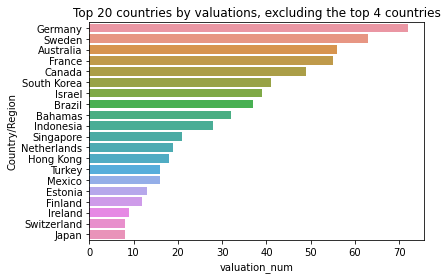

In [92]:
# Create a barplot to compare the top 20 countries with highest company valuations.
sns.barplot(data = national_valuation_no_big4.head(20), x = 'valuation_num', y = 'Country/Region')
### YOUR CODE HERE ###
plt.title('Top 20 countries by valuations, excluding the top 4 countries')
# Show the plot.
plt.show()
### YOUR CODE HERE ###

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

  Select the top 20 rows in `national_valuations_no_big4`.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

* Select the top 20 rows in `df_companies_sum_outliers_removed` by using the `head(20)` method.
* Specify `Country/Region` for the `x` parameter of the function and `valuation_num` for the `y` parameter of the function (or vice versa).

</details>

### Plot maps

Your investor has also asked for a global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` (a.k.a. "big-four countries").

You have learned about using [`scatter_geo()`](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo) from the `plotly.express` library to create plot data on a map. Create a `scatter_geo()` plot that depicts the total valuations of each non-big-four country on a world map, where each valuation is shown as a circle on the map, and the size of the circle is proportional to that country's summed valuation.

In [100]:
# Plot the sum of valuations per country.
px.scatter_geo(national_valuation_no_big4, 
               locations = 'Country/Region',
               size = 'valuation_num',
              locationmode = 'country names',
              color = 'Country/Region')
### YOUR CODE HERE ###


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `national_valuations_no_big4` dataframe that you already created.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

To plot the data:
* Use `national_valuations_no_big4` as the `data_frame` argument of the `scatter_geo()` function.
* Use `'Country/Region'` as the `locations` argument.
* Use `'country names'` as the `locationmode` argument.
* Use `'Country/Region'` as the `color` argument.

Don't forget to include a title!
</details>

**Question: How is the valuation sum per country visualized in the plot?**


[Write your response here. Double-click (or enter) to edit.]

**Question: Does any region stand out as having a lot of activity?**


[Write your response here. Double-click (or enter) to edit.]

## Conclusion

**What are some key takeaways that you learned during this lab?**

[Write your response here. Double-click (or enter) to edit.]

**How would you present your findings from this lab to others? Consider the information you would provide (and what you would omit), how you would share the various data insights, and how data visualizations could help your presentation.**

[Write your response here. Double-click (or enter) to edit.]




**Reference**

[Bhat, M.A. *Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies)



**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.